## Wrapper Methods
Machine learning problems often involve datasets with many features. Some of those features might be very important for a specific machine learning model. Other features might be irrelevant. Given a feature set and a model, we would like to be able to distinguish between important and unimportant features (or even important combinations of features). Wrapper methods do exactly that.


#### Setting Up a Logistic Regression Model
Before we can use the wrapper method we need to specify the machine learning model.

**Logistic Regression** Give a probability that an observation belongs to a category.

#### Sequential Forward Selection
Sequential forward selection is a wrapper method that builds a feature set by starting with no features and then adding one feature at a time until a desired number of features is reached


#### Sequential Forward Selection with mlxtend


In [62]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt



In [63]:
# Load the data
health = pd.read_csv("../../../Downloads/data-bank/dataR2.csv")

X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr, k_features=3, forward=True, floating=False,
         scoring="accuracy", cv=0)

# Fit the equential forward selection model
sfs.fit(X,y)



SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=3, scoring='accuracy')

#### Evaluating the result of sequential forward selection

In [65]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': 0.7241379310344828,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': 0.7327586206896551,
  'feature_names': ('Age', 'Glucose')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': 0.7672413793103449,
  'feature_names': ('Age', 'Glucose', 'Insulin')}}

/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


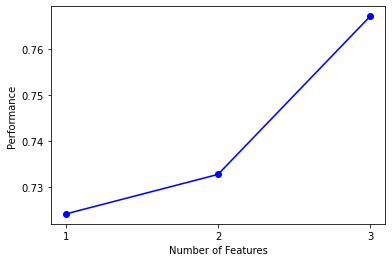

In [66]:
# Print the chosen feature names
sfs.subsets_[3]["feature_names"]

# Print the accuracy of the model after sequential forward selection
sfs.subsets_[3]["avg_score"]

# Print the accuracy of the model after sequential forward selection
plot_sfs(sfs.get_metric_dict())
plt.show()


#### Sequential Backward Selection with mlxtend

Sequential backward selection is another wrapper method for feature selection. It is very similar to sequential forward selection, but there is one key difference. Instead of starting with no features and adding one feature at a time, sequential backward selection starts with all of the available features and removes one feature at a time.

In [67]:

# Sequential forward selection
sbs = SFS(lr, k_features=3, forward=False, floating=False,
         scoring="accuracy", cv=0)

# Fit the equential forward selection model
sbs.fit(X,y)
sbs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin',
   'MCP.1')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Resistin')},
 6: {'feature_idx': (0, 1, 2, 3, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')},
 5: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.79310345]),
  'avg_score': 0.79

#### Evaluating the result of sequential forward selection

In [73]:
# Print the chosen feature names
sbs.subsets_[3]["feature_names"]

# Print the accuracy of the model after sequential backward selection
sbs.subsets_[3]["avg_score"]


0.7413793103448276

/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


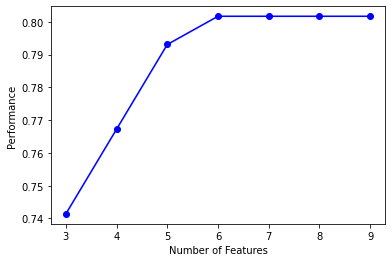

In [74]:
# Plot the model accuracy

plot_sfs(sbs.get_metric_dict())
plt.show()